In [1]:
!pip install tensorflow==1.8.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#1)Age
#2)BMI
#3)Children
#4)Smoker

In [6]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
corr = data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
data2 = data.copy()

In [9]:
for i in range(len(data['sex'])):
  if data2['sex'][i] == 'male':
    data2['sex'][i] = 1.0
  else :
    data2['sex'][i] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
data2['sex'] = data2['sex'].astype(np.float32)

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float32
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float32(1), float64(2), int64(2), object(2)
memory usage: 68.1+ KB


In [12]:
data2_corr = data2.corr()
data2_corr

,age,sex,bmi,children,charges
age,1.000000,-0.020856,0.109272,0.042469,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.067998
charges,0.299008,0.057292,0.198341,0.067998,1.000000


In [13]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cat_encoder = ordinal_encoder.fit_transform(data[['region']])
cat_encoder[:10]

array([[3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.]])

In [14]:
data2['region'] = cat_encoder

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float32
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float32(1), float64(3), int64(2), object(1)
memory usage: 68.1+ KB


In [16]:
data_y = data2['age']
data_age = data2.copy()

In [17]:
data_corr = data_age.corr()
data_corr

,age,sex,bmi,children,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.016569,0.067998
region,0.002127,0.004588,0.157566,0.016569,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,-0.006208,1.000000


In [18]:
for i in range(len(data2['smoker'])):
  if data2['smoker'][i] == 'yes':
    data2['smoker'][i] = 1.0
  else:
    data2['smoker'][i] = 0.0  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
data2['smoker'] = data2['smoker'].astype(np.float32)

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float32
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float32
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float32(2), float64(3), int64(2)
memory usage: 62.8 KB


In [21]:
data2 = data2.astype(np.float32)

In [76]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data2, test_size= 0.2, random_state = 42)
train_set

,age,sex,bmi,children,smoker,region,charges
560,46.0,0.0,19.950001,2.0,0.0,1.0,9193.838867
1285,47.0,0.0,24.320000,0.0,0.0,0.0,8534.671875
1142,52.0,0.0,24.860001,0.0,0.0,2.0,27117.994141
969,39.0,0.0,34.320000,5.0,0.0,2.0,8596.828125
486,54.0,0.0,21.469999,3.0,0.0,1.0,12475.351562
...,...,...,...,...,...,...,...
1095,18.0,0.0,31.350000,4.0,0.0,0.0,4561.188477
1130,39.0,0.0,23.870001,5.0,0.0,2.0,8582.302734
1294,58.0,1.0,25.174999,0.0,0.0,0.0,11931.125000
860,37.0,0.0,47.599998,2.0,1.0,3.0,46113.511719


In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_set = scaler.fit_transform(train_set)
test_set = scaler.fit_transform(test_set)

In [80]:
train_y = train_set[:,0]
train_set = train_set[:,1:]

In [79]:
test_y = test_set[:,0]
test_set = test_set[:,1:]

In [81]:
train_set.shape


(1070, 6)

In [28]:
train_set

,sex,bmi,children,smoker,region,charges
560,0.0,19.950001,2.0,0.0,1.0,9193.838867
1285,0.0,24.320000,0.0,0.0,0.0,8534.671875
1142,0.0,24.860001,0.0,0.0,2.0,27117.994141
969,0.0,34.320000,5.0,0.0,2.0,8596.828125
486,0.0,21.469999,3.0,0.0,1.0,12475.351562
...,...,...,...,...,...,...
1095,0.0,31.350000,4.0,0.0,0.0,4561.188477
1130,0.0,23.870001,5.0,0.0,2.0,8582.302734
1294,1.0,25.174999,0.0,0.0,0.0,11931.125000
860,0.0,47.599998,2.0,1.0,3.0,46113.511719


In [86]:
train_y = train_y.reshape(len(train_y),1)
test_y = test_y.reshape(len(test_y),1)

In [95]:
import tensorflow as tf

X = tf.placeholder(tf.float32,shape=[None,6])
Y = tf.placeholder(tf.float32,shape=[None,1])

L1 = tf.Variable(tf.random_normal([6,32],stddev = 0.1))
W1 = tf.nn.relu(tf.matmul(X,L1))
L2 = tf.Variable(tf.random_normal([32,1],stddev = 0.1))

model = tf.matmul(W1,L2)

In [96]:
cost = tf.reduce_mean(tf.square(model- Y))
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# 비용을 최소화 하는 것이 최종 목표


In [97]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(600000):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: train_set, Y: train_y})

        if step % 10000 == 0:
          print(step, cost_val)
    prediction = sess.run(model,feed_dict={X:test_set})
    prediction2 = sess.run(model,feed_dict={X:train_set})

0 0.37218717
10000 0.09633707
20000 0.08636954
30000 0.07979262
40000 0.07473386
50000 0.07096551
60000 0.06830073
70000 0.06638074
80000 0.06490333
90000 0.063725404
100000 0.06273849
110000 0.061932024
120000 0.061240394
130000 0.060622606
140000 0.06009621
150000 0.059634786
160000 0.05920537
170000 0.058793608
180000 0.058394052
190000 0.05798601
200000 0.057591964
210000 0.057195526
220000 0.056788277
230000 0.056350466
240000 0.05588215
250000 0.05539782
260000 0.05488362
270000 0.054336004
280000 0.053754296
290000 0.053138163
300000 0.052492056
310000 0.05181436
320000 0.051105745
330000 0.050376147
340000 0.049627
350000 0.048867755
360000 0.04810289
370000 0.04733914
380000 0.04658666
390000 0.04582478
400000 0.045072917
410000 0.044255484
420000 0.043205403
430000 0.04245218
440000 0.041859575
450000 0.041318033
460000 0.040834393
470000 0.040400796
480000 0.04000505
490000 0.039645463
500000 0.039326586
510000 0.03904436
520000 0.038791712
530000 0.038564786
540000 0.038361

In [90]:
prediction[:5]

array([[0.34734064],
       [0.28217623],
       [0.34678817],
       [0.42839253],
       [0.41295952]], dtype=float32)

In [91]:
prediction2[:5]

array([[0.3572808 ],
       [0.30973285],
       [0.93264663],
       [0.5566351 ],
       [0.48985863]], dtype=float32)

In [92]:
train_y[:5]

array([[0.6086956 ],
       [0.63043475],
       [0.7391304 ],
       [0.45652178],
       [0.78260875]], dtype=float32)

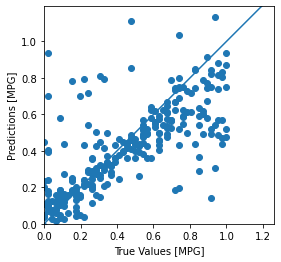

In [98]:
import matplotlib.pyplot as plt

plt.scatter(test_y, prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
